In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("compas.csv")

In [3]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

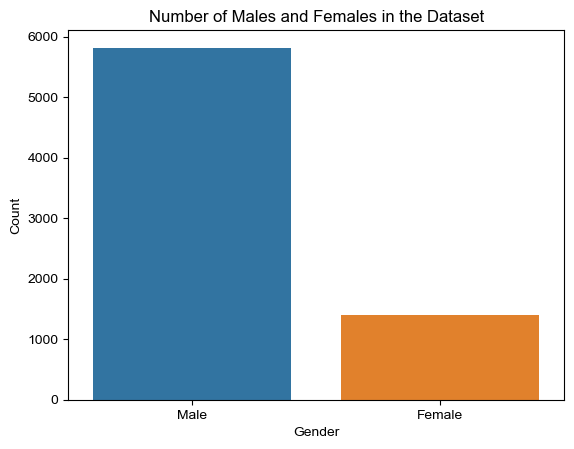

In [5]:
#seaborn used to visualise data and it works ontop of matplotlib to label the visualizations

import seaborn as sb
import matplotlib.pyplot as plt

# creates a bar chart where the x axis becomes the indicies of genderCount (the different values from the previous line)
# and the y axis becomes the number associated with that value (how many times it shows up)
sb.countplot(x=df['sex'])

sb.set_style("whitegrid")

# gives the chart x and y labels and a title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Males and Females in the Dataset')

plt.show()

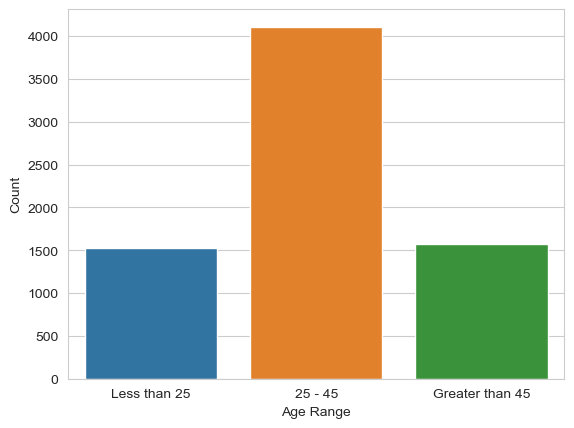

25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: age_cat, dtype: int64

In [6]:
desiredOrder = ['Less than 25', '25 - 45', 'Greater than 45']

# Create a bar plot to visualize the counts
sb.countplot(x=df['age_cat'], order=desiredOrder)

sb.set_style("whitegrid")

# gives the chart x and y labels and a title
plt.xlabel('Age Range')
plt.ylabel('Count')

plt.show()

ageRanges = df['age_cat'].value_counts()
ageRanges

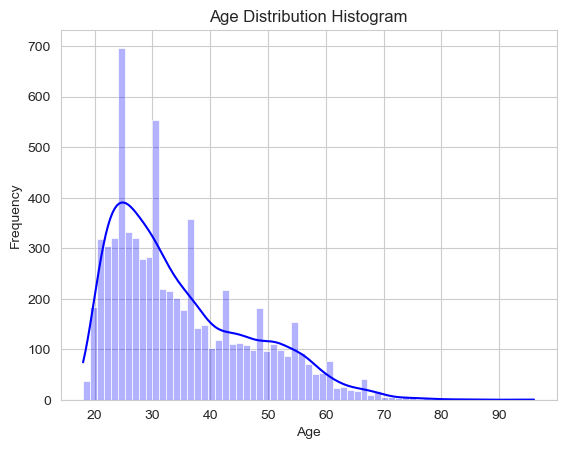

In [7]:
sb.histplot(df['age'], bins=65, kde=True, color='blue', alpha=0.3)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

plt.show()

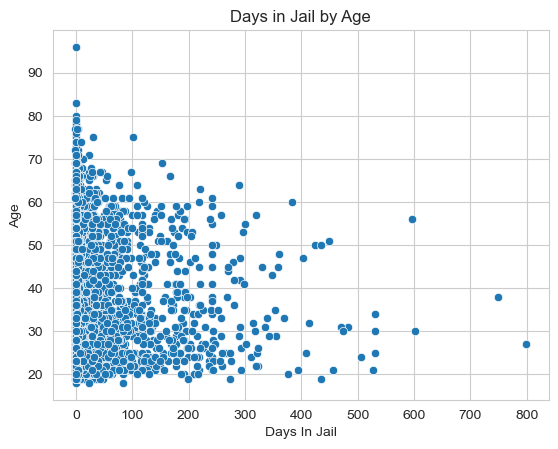

In [8]:
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

df['c_days_in_jail'] = (df['c_jail_out'] - df['c_jail_in']).dt.days

sb.scatterplot(data=df , x = "c_days_in_jail" , y = "age")

plt.xlabel('Days In Jail')
plt.ylabel('Age')
plt.title('Days in Jail by Age')

plt.show()

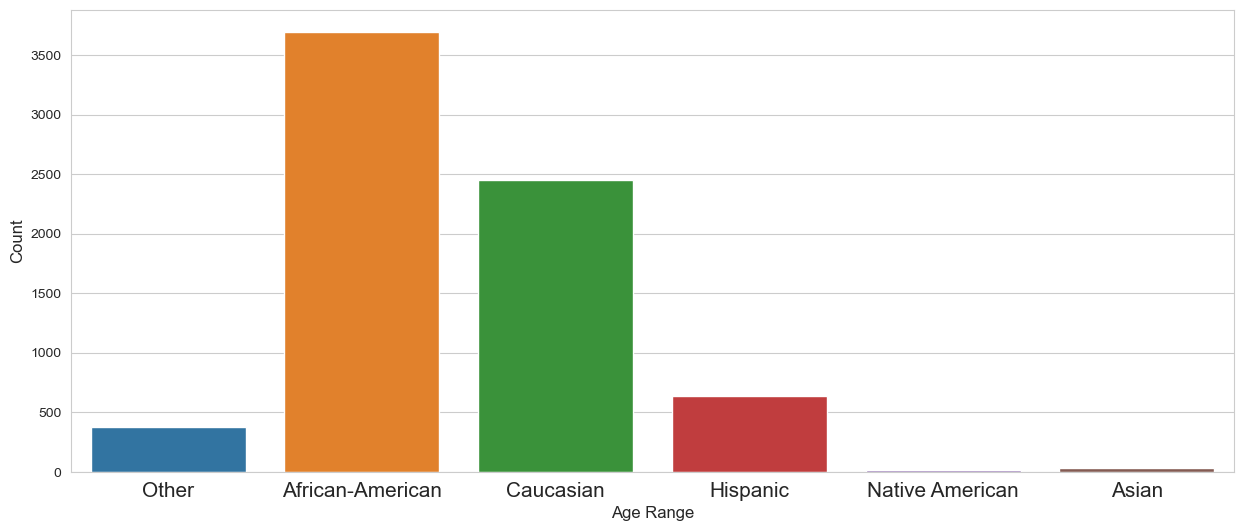

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [9]:
sb.set_style("whitegrid")
plt.figure(figsize = (15,6))

sb.countplot(x=df['race'])

plt.xlabel('Age Range', fontsize = 12)
plt.xticks(fontsize = 15)

plt.ylabel('Count', fontsize = 12)

plt.show()

races = df['race'].value_counts()
races

1     1440
2      941
4      769
3      747
5      681
6      641
7      592
8      512
9      508
10     383
Name: decile_score, dtype: int64


<AxesSubplot:xlabel='decile_score', ylabel='Count'>

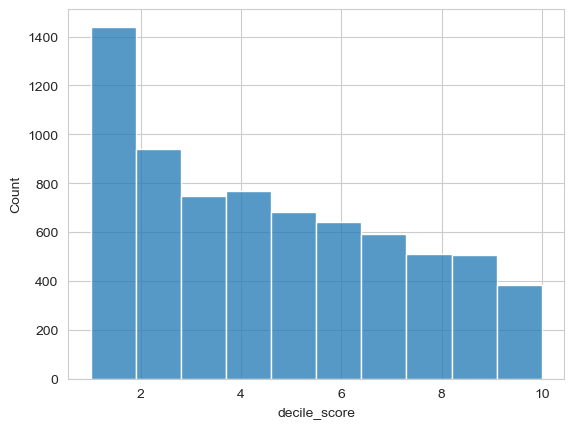

In [10]:
scores = df["decile_score"].value_counts()
print(scores)

sb.histplot(df['decile_score'], bins=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


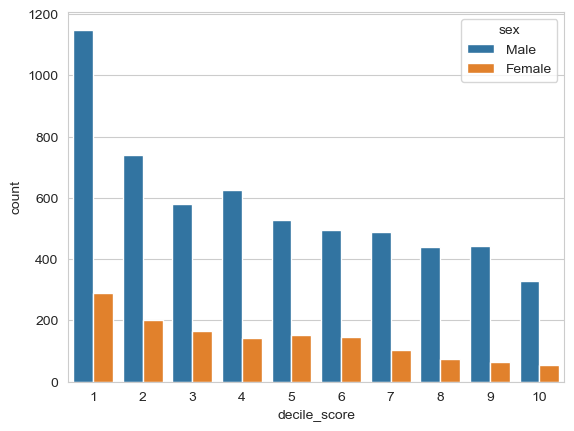

In [16]:
maleScores = df[df.loc[:,'sex'] == 'Male']['decile_score']
femaleScores = df[df.loc[:,'sex'] == 'Female']['decile_score']

sb.countplot(df['decile_score'], hue=df['sex'])

plt.show()

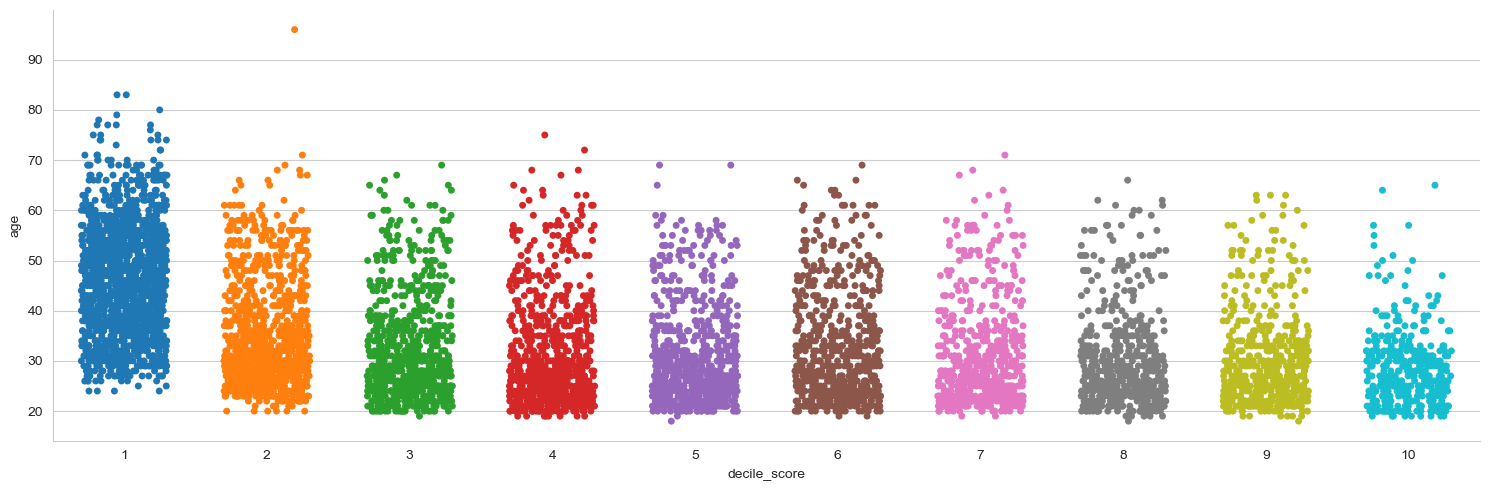

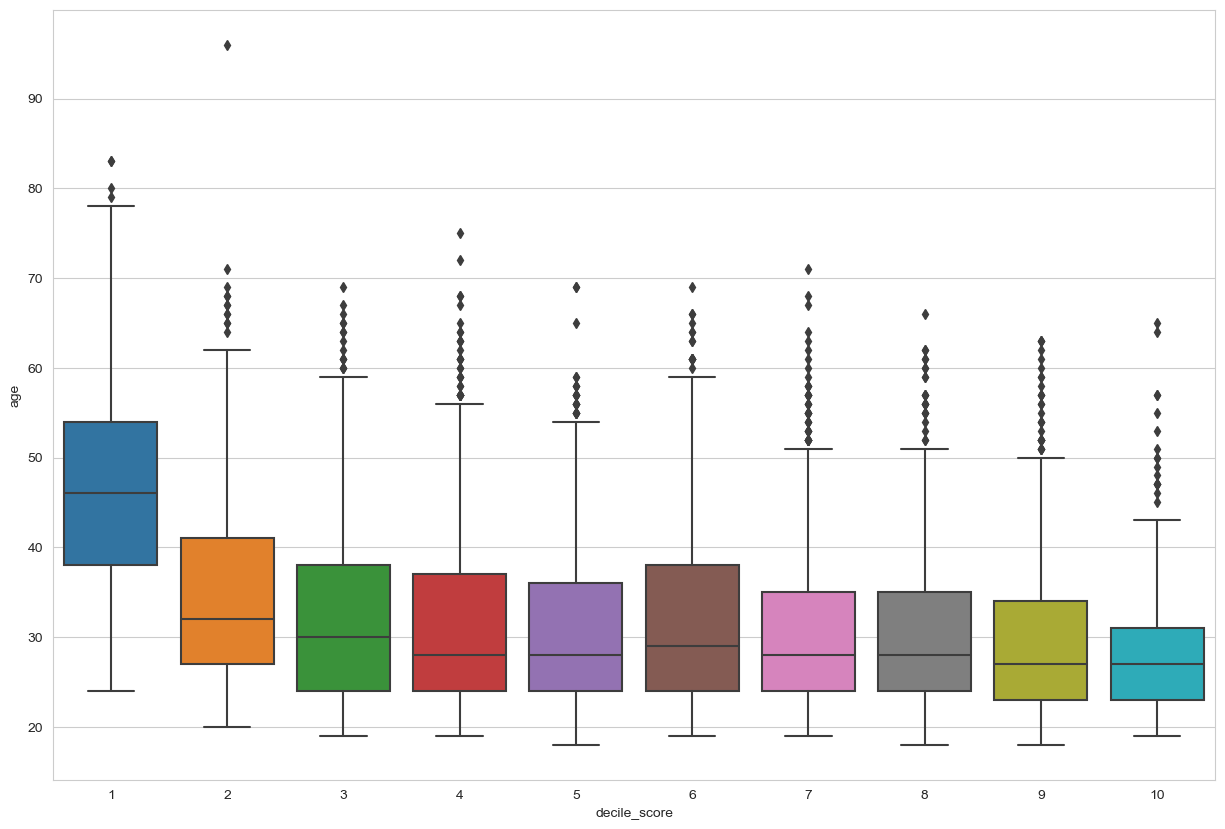

In [12]:
sb.catplot(data=df, x='decile_score', y='age', jitter = 0.3, aspect=3)

plt.figure(figsize = (15,10))

sb.boxplot(data=df, x='decile_score', y='age')

plt.show()

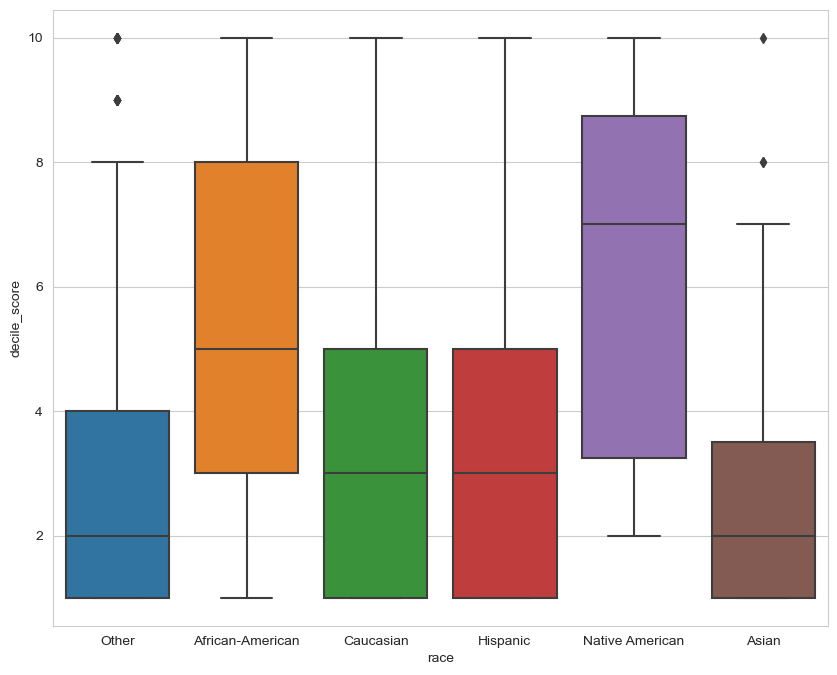

In [13]:
plt.figure(figsize = (10,8))

sb.boxplot(data=df, x='race', y='decile_score')

plt.show()

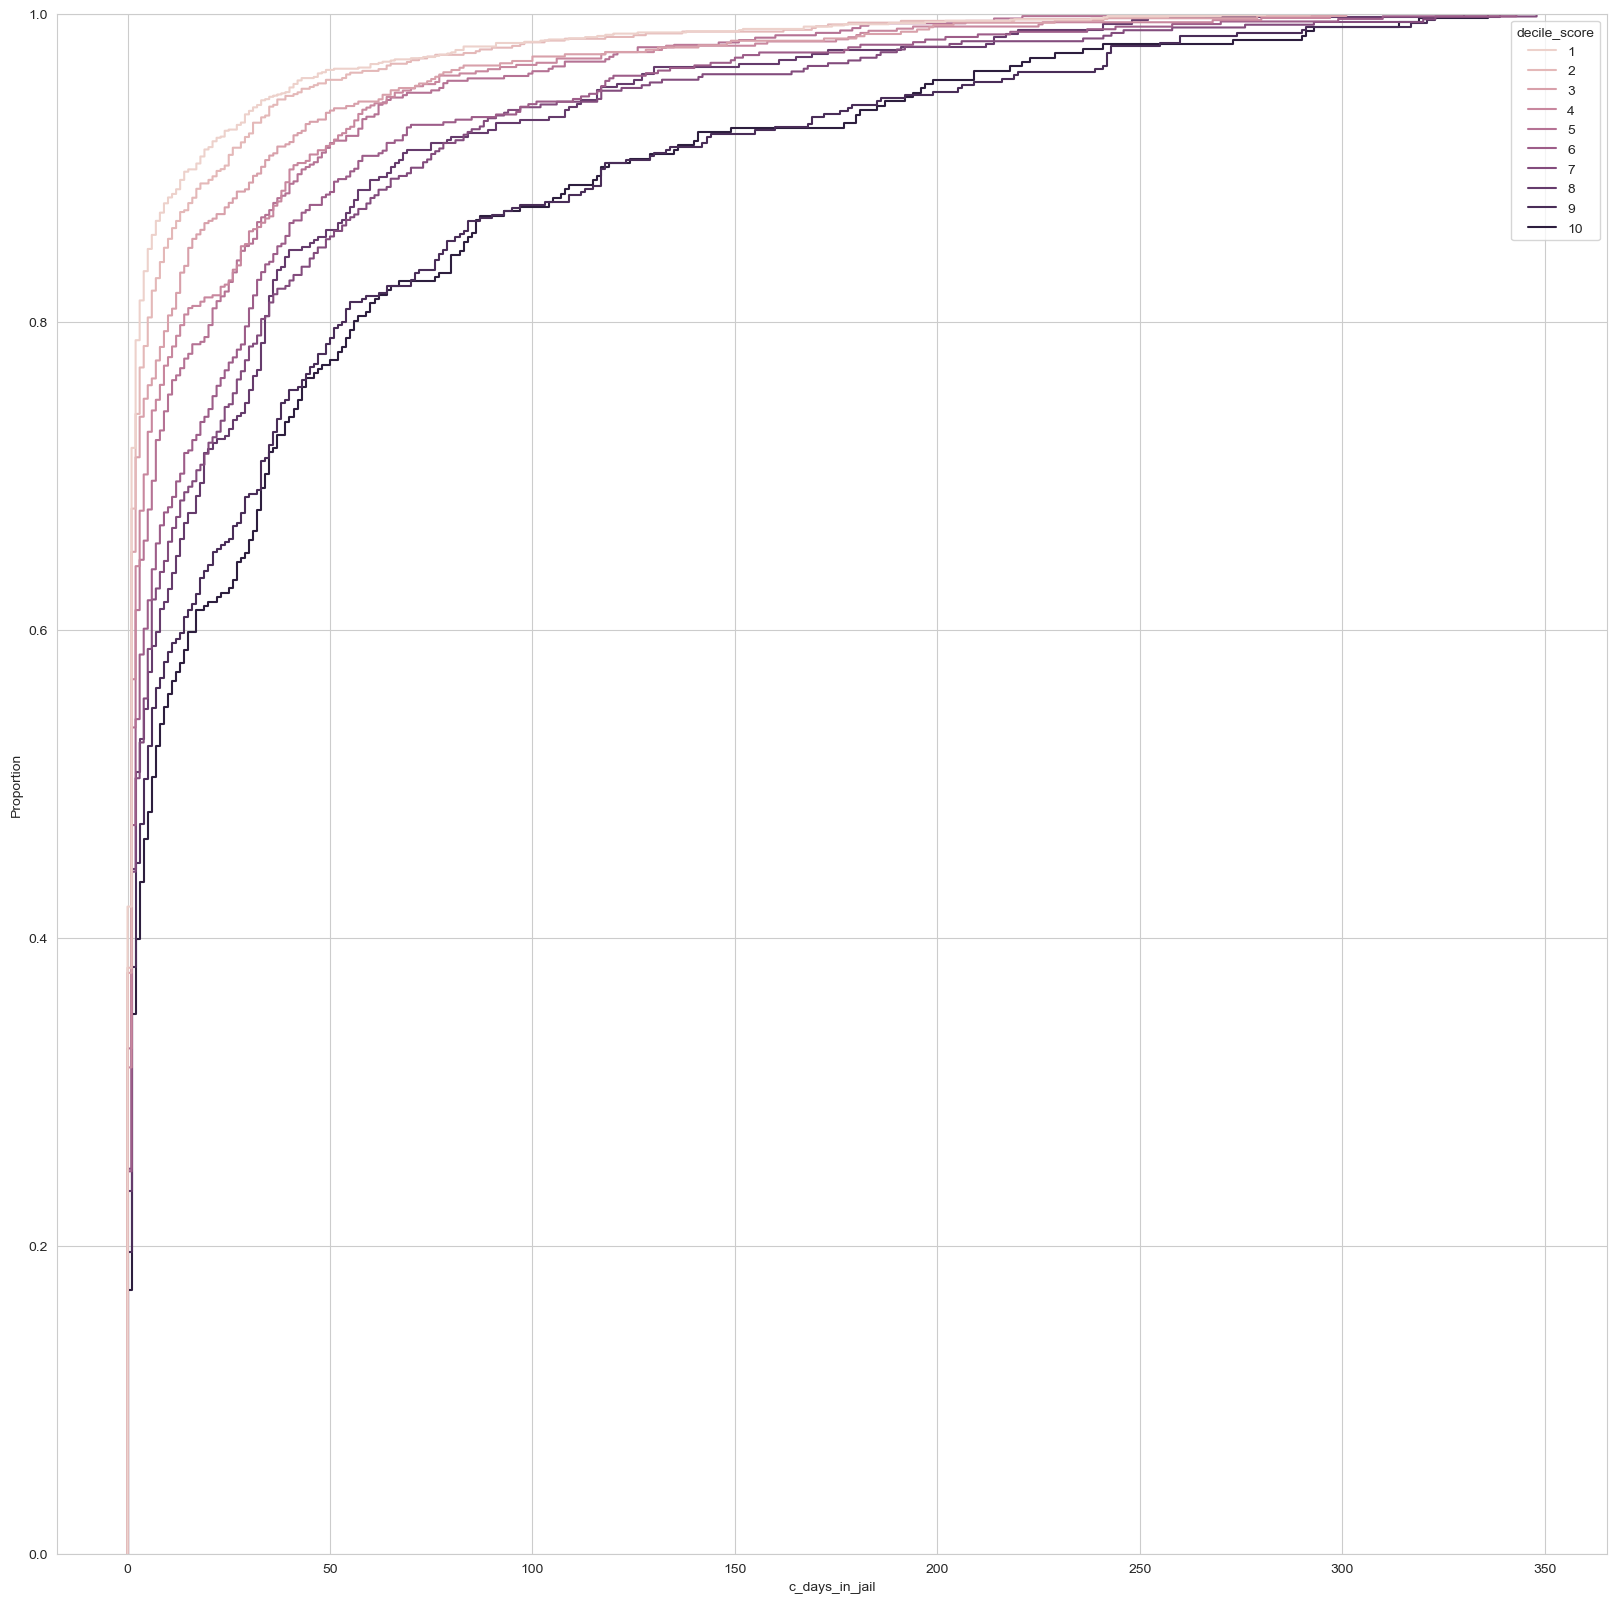

In [14]:
plt.figure(figsize = (20,20))

filtered_df = df[(df['c_days_in_jail'] >= 0) & (df['c_days_in_jail'] <= 350)]

sb.ecdfplot(data=filtered_df, x='c_days_in_jail', hue='decile_score')

plt.show()

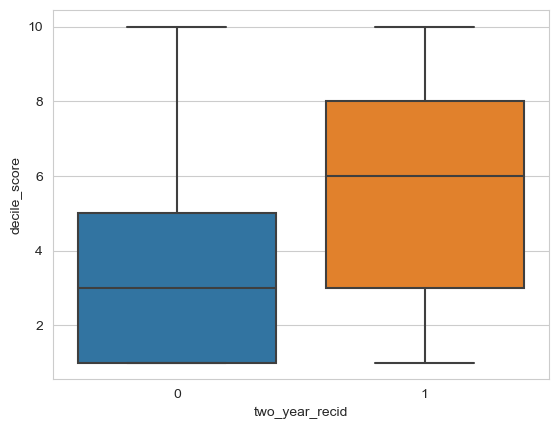

In [15]:
sb.boxplot(data=df, y=df['decile_score'], x=df['two_year_recid'])

plt.show()